In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
batch_size=256
learning_rate=0.0002
num_epoch=10


In [ ]:
mnist_train=dset.MNIST("./",train=True, transform=transforms.ToTensor(),target_transform=None,download=True)
mnist_test=dset.MNIST("./",train=False, transform=transforms.ToTensor(),target_transform=None,download=True)

In [4]:
train_loader=torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=2,drop_last=True)
test_loader=torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)

# Autoencoder1모델 구현, 학습 및 결과 확인

In [5]:
class Autoencoder1(nn.Module):
    def __init__(self):
        super(Autoencoder1, self).__init__()
        self.encoder = nn.Linear(28*28, 128)
        self.decoder = nn.Linear(128, 28*28)

    def forward(self, x):
        x=x.view(batch_size,-1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        return out


In [6]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model1=Autoencoder1().to(device)

loss_func=nn.MSELoss()
optimizer=torch.optim.Adam(model1.parameters(),lr=learning_rate)


cuda:0


In [7]:
loss_arr=[]
for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    noise=init.normal_(torch.FloatTensor(batch_size,1,28,28),0,0.1)
    image=image+noise
    image=image.to(device)
    x=image.to(device)
    optimizer.zero_grad()
    output=model1.forward(x)
    loss=loss_func(output,x)
    loss.backward()
    optimizer.step()

    if j%1000==0:
      print(loss)
      loss_arr.append(loss.cpu().item())

tensor(0.1413, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>)


torch.Size([256, 28, 28])


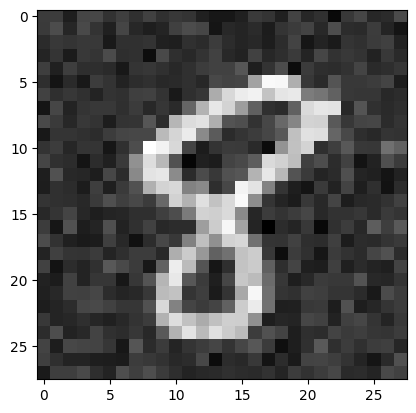

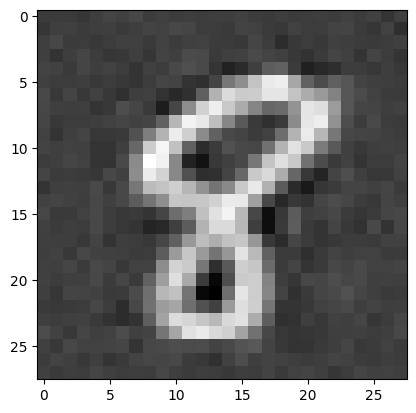

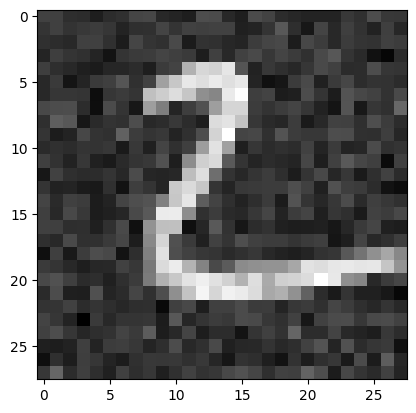

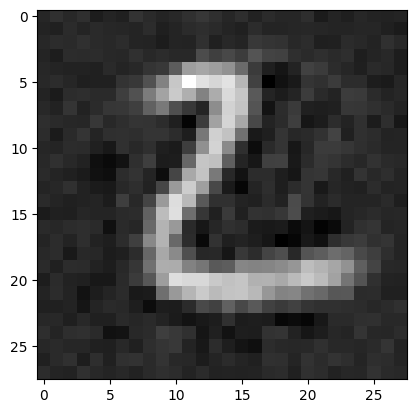

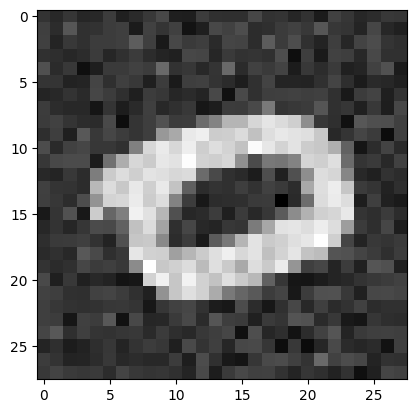

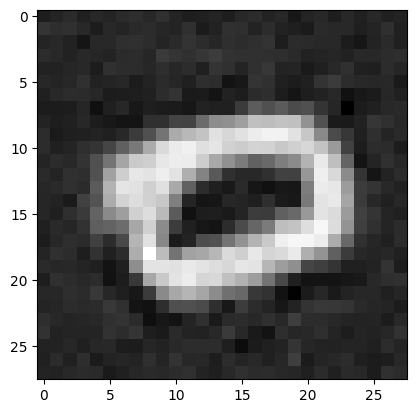

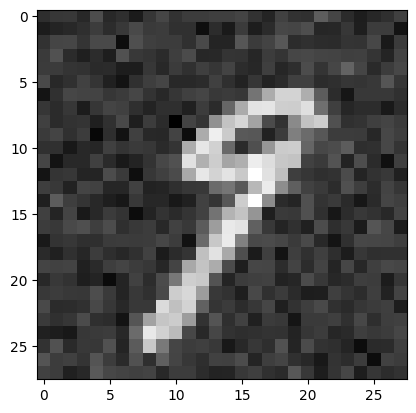

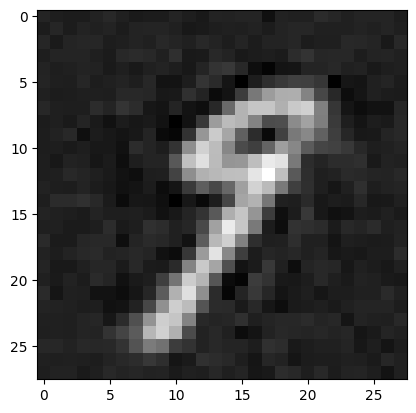

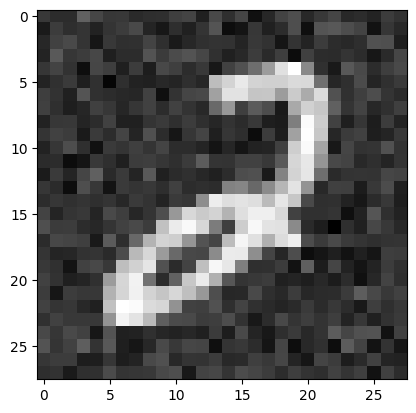

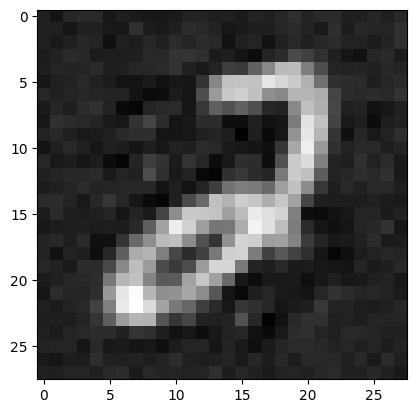

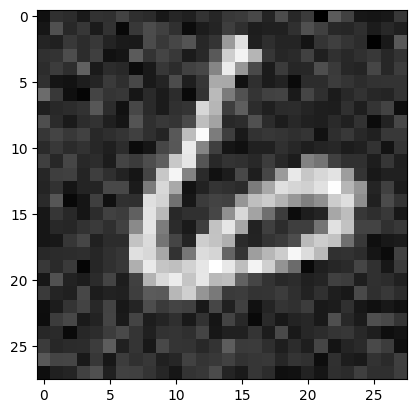

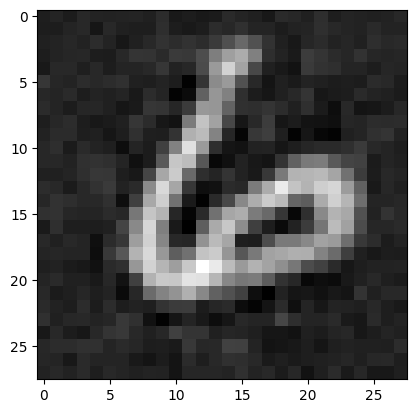

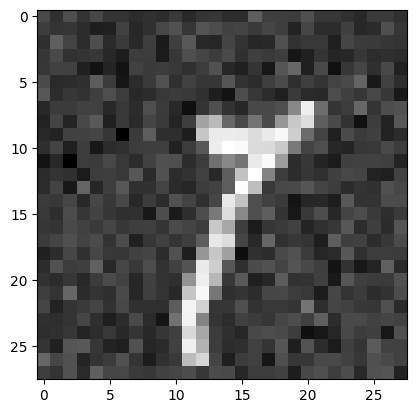

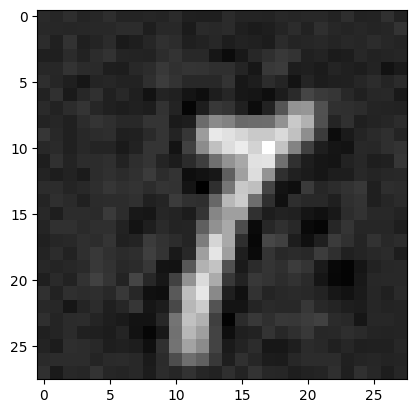

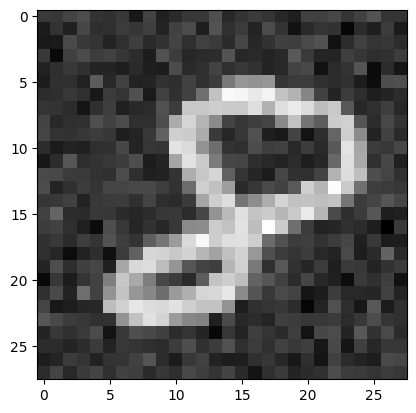

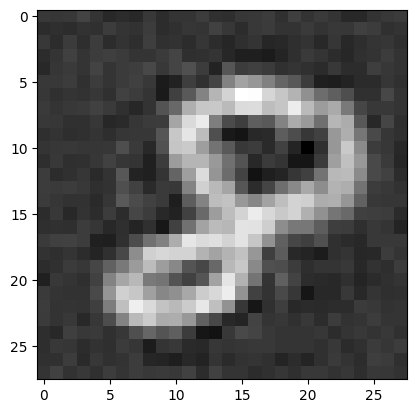

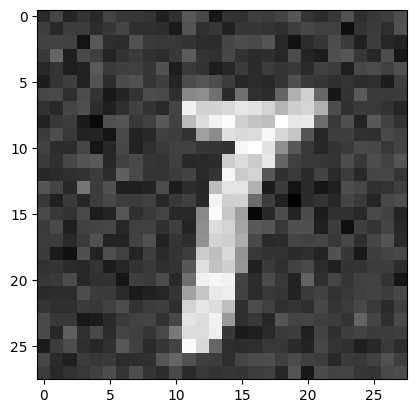

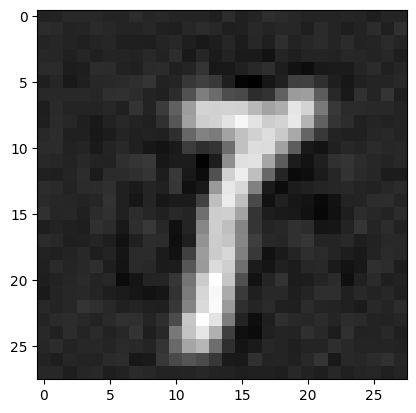

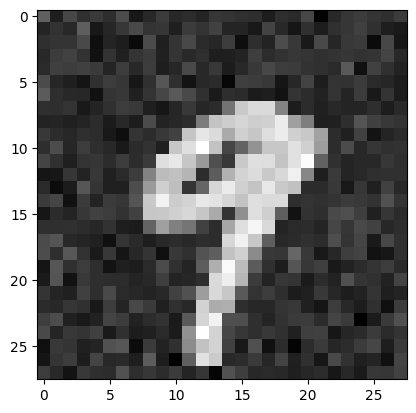

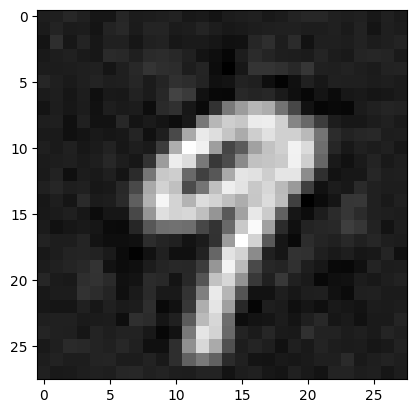

In [8]:
out_img=torch.squeeze(output.cpu().detach())
print(out_img.size())

for i in range(10):
  plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap="gray")
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap="gray")
  plt.show()

# Autoencoder2 모델 구현 학습 및 결과 확인

In [9]:
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28),
            nn.Sigmoid()
        )
    def forward(self, x):
          x = x.view(-1, 28*28)
          encoded = self.encoder(x)
          out = self.decoder(encoded).view(-1, 1, 28, 28)
          return out

In [10]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model2=Autoencoder2().to(device)

loss_func=nn.MSELoss()
optimizer=torch.optim.Adam(model2.parameters(),lr=learning_rate)

cuda:0


In [11]:
loss_arr=[]
for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    noise=init.normal_(torch.FloatTensor(batch_size,1,28,28),0,0.1)
    image=image+noise
    image=image.to(device)
    x=image.to(device)
    optimizer.zero_grad()
    output=model2.forward(x)
    loss=loss_func(output,x)
    loss.backward()
    optimizer.step()

    if j%1000==0:
      print(loss)
      loss_arr.append(loss.cpu().item())

tensor(0.2413, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0652, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)


torch.Size([256, 28, 28])


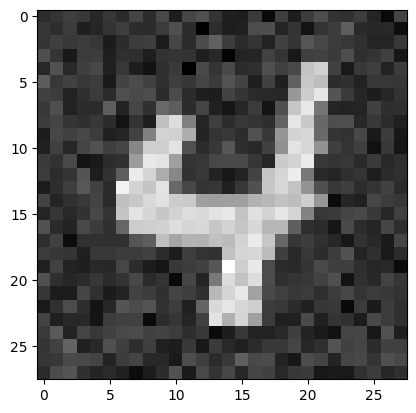

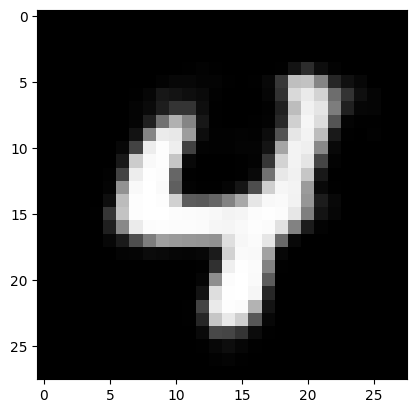

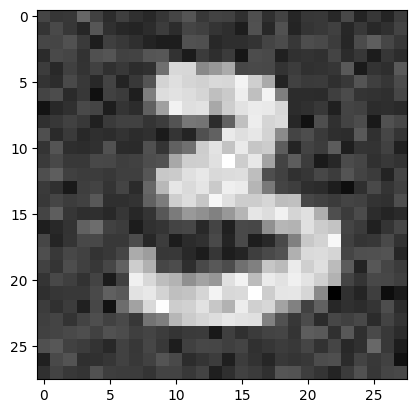

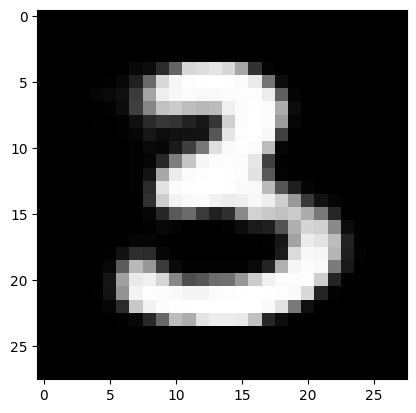

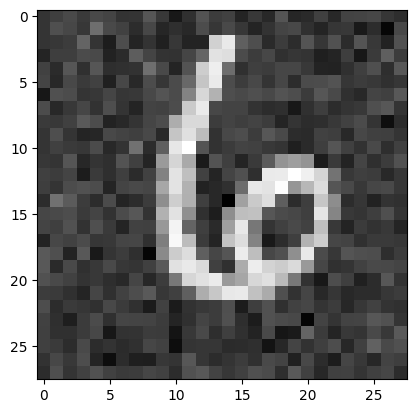

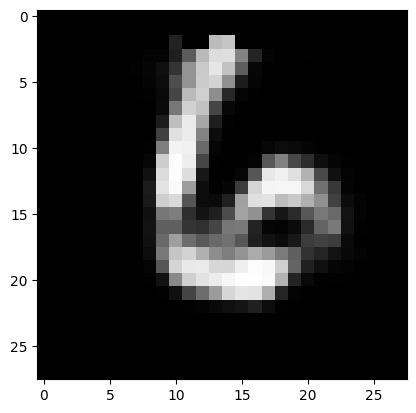

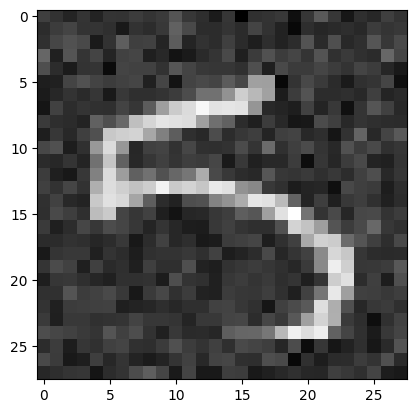

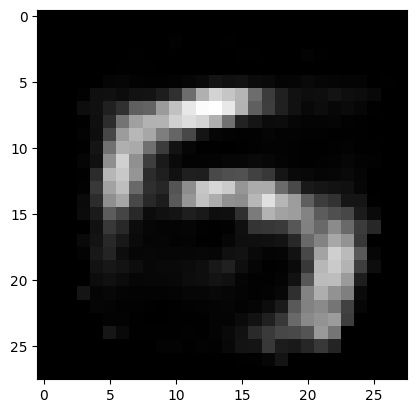

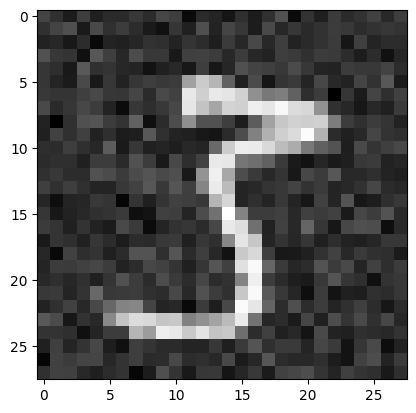

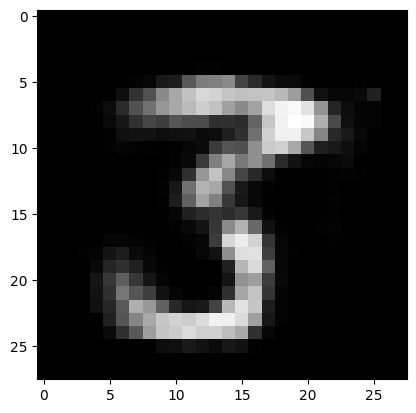

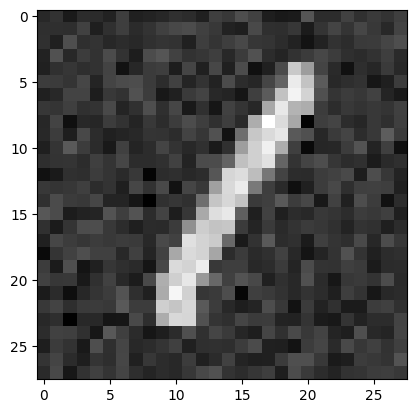

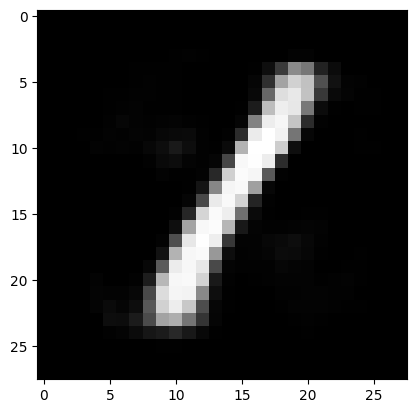

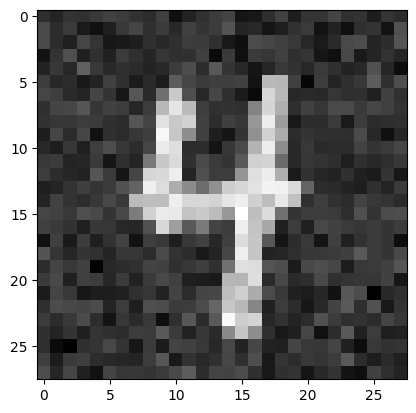

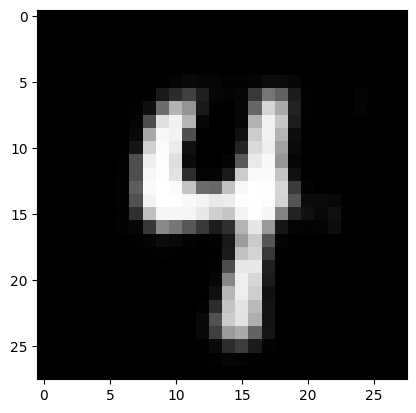

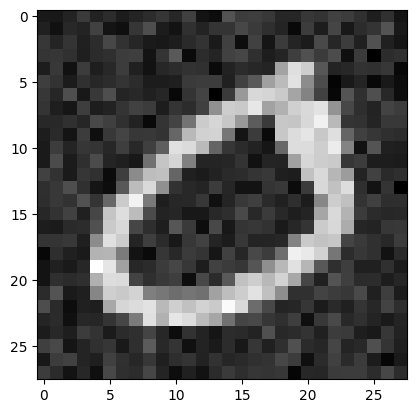

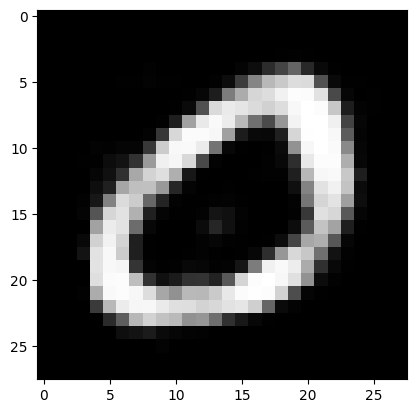

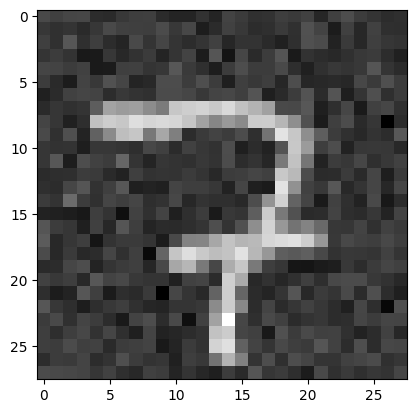

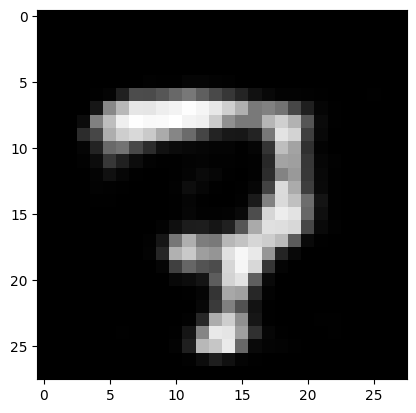

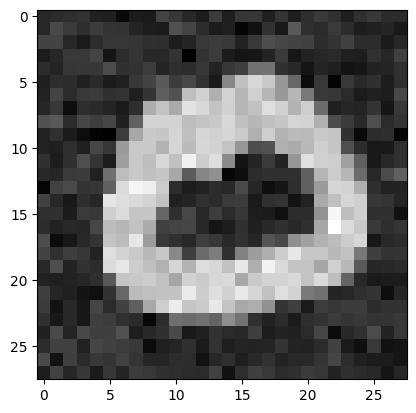

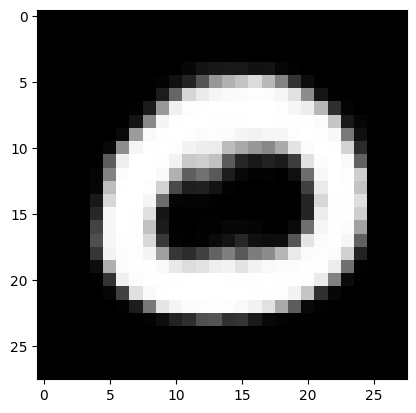

In [12]:
out_img=torch.squeeze(output.cpu().detach())
print(out_img.size())

for i in range(10):
  plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap="gray")
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap="gray")
  plt.show()

# 합성곱 오토인코더 모델 구현 학습 및 결과 확인

In [13]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16,32,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,64,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2)
    )
    self.layer2=nn.Sequential(
         nn.Conv2d(64,128,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
         nn.Conv2d(128,256,3,padding=1),
         nn.ReLU()
    )
  def forward(self,x):
      out=self.layer1(x)
      out=self.layer2(out)
      out=out.view(batch_size,-1)
      return out

In [14]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.layer1=nn.Sequential(
        nn.ConvTranspose2d(256,128,3,2,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128,64,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
    )
    self.layer2=nn.Sequential(
         nn.ConvTranspose2d(64,16,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
         nn.ConvTranspose2d(16,1,3,2,1,1),
        nn.ReLU(),
    )
  def forward(self,x):
      out=x.view(batch_size,256,7,7)
      out=self.layer1(out)
      out=self.layer2(out)

      return out

In [15]:
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)

encoder=Encoder().to(device)
decoder=Decoder().to(device)

parameters=list(encoder.parameters())+list(decoder.parameters())

loss_func=nn.MSELoss()
optimizer=torch.optim.Adam(parameters,lr=learning_rate)

cuda:0


In [16]:
for i in range(num_epoch):
  for j,[image,label]in enumerate(train_loader):
    optimizer.zero_grad()
    image=image.to(device)

    output=encoder(image)
    output=decoder(output)

    loss=loss_func(output,image)
    loss.backward()
    optimizer.step()

torch.Size([256, 28, 28])


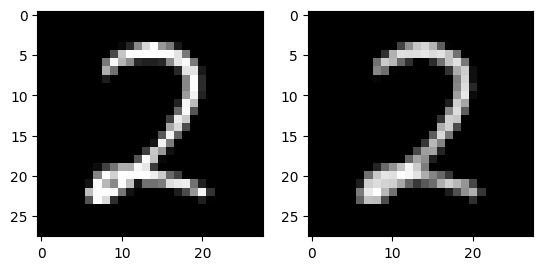

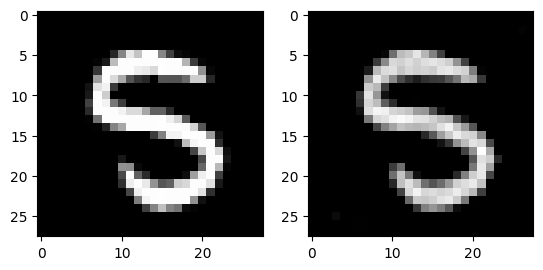

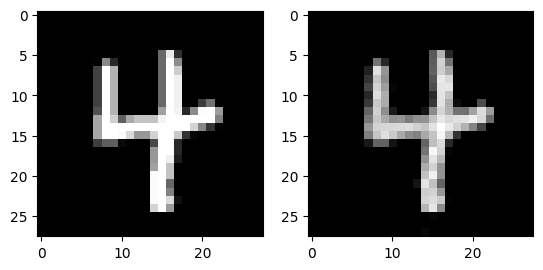

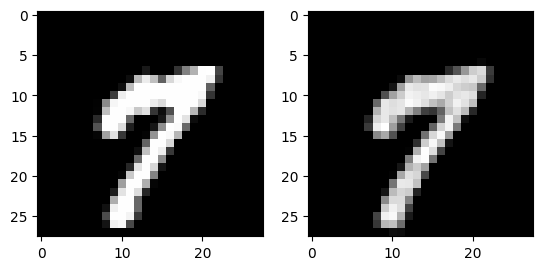

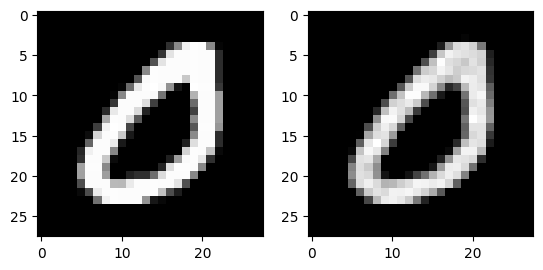

In [17]:
out_img=torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.subplot(1,2,1)
  plt.imshow(torch.squeeze(image[i]).cpu().numpy(),cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()